In [40]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check Nan in the DataFrame
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6169688666044776, 0.975, 'x[5] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.39135377798507465, 0.925, 'x[4] <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.19362173507462688, 0.875, 'x[1] <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.06902985074626866, 0.825, 'x[2] <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.061567164179104475, 0.775, 'x[1] <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.054104477611940295, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.06902985074626866, 0.725, 'x[4] <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.061567164179104475, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07649253731343283, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07649253731343283, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3182136194029851, 0.825, 'x[7] <= 0.5\nentropy = 0.477\nsampl

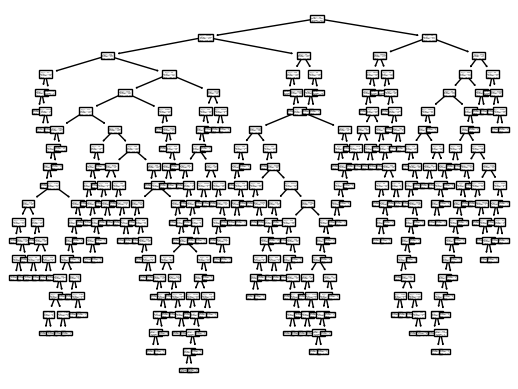

In [9]:
tree.plot_tree(clf)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf.score(X_train, y_train)

0.9714765100671141

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
clf.score(X_test, y_test)

0.8101694915254237

In [16]:
max_depth_values = range(1, 100)

In [17]:
scores_data = pd.DataFrame()

In [18]:
from sklearn.model_selection import cross_val_score

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(t

C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(t

C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\aurrog\AppData\Local\Temp\ipykernel_12220\4249650297.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(t

In [19]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350


In [20]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [21]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [22]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.803739
205,8,cross_val_score,0.793641
206,9,cross_val_score,0.793641
207,10,cross_val_score,0.798669


<Axes: xlabel='max_depth', ylabel='score'>

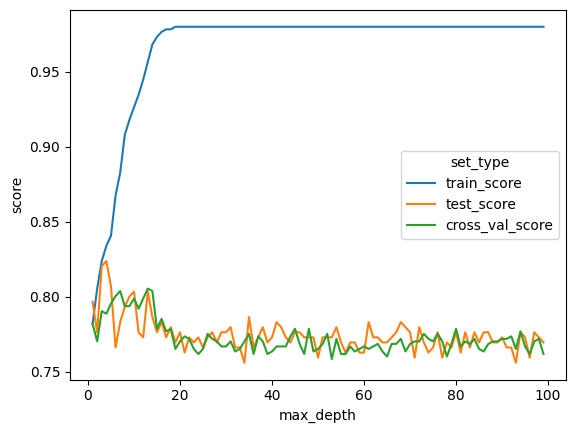

In [23]:
sns.lineplot(x='max_depth', y='score', data=scores_data_long, hue='set_type')

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [26]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parametrs = {'criterion': ['gini', 'entropy'], max_depth: range(1, 30)}

In [29]:
clf = tree.DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [30]:
from sklearn.model_selection import GridSearchCV
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
clf=tree.DecisionTreeClassifier()
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
best_clf = grid_search_cv_clf.best_estimator_

In [31]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
y_pred = best_clf.predict(X_test)

In [34]:
precision_score(y_test, y_pred)

0.8020833333333334

In [35]:
recall_score(y_test, y_pred)

0.6416666666666667

In [36]:
y_predicted_prob = best_clf.predict_proba(X_test)

<Axes: >

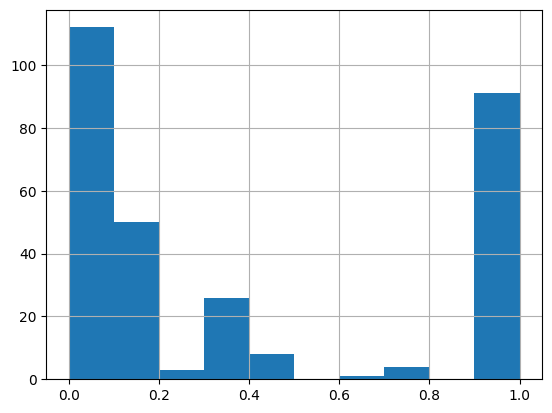

In [39]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [51]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [52]:
precision_score(y_test, y_pred)

0.8131868131868132

In [53]:
recall_score(y_test, y_pred)

0.6166666666666667

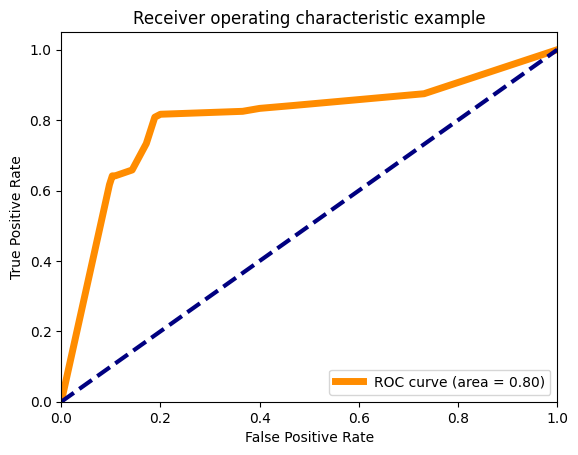

In [60]:
# rock кривая

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# y - recall
# x - how often we classsifise not right